In [1]:
import matplotlib.pyplot as plt
import numpy as np
import PIL
import tensorflow as tf
import os
from keras import Sequential
from tensorflow.keras import layers
import glob

In [21]:
import random
data_dir = './data/QualityControlTraining'
images = glob.glob(data_dir + '/ACCEPT/*')
extensions = ['/ACCEPT', '/REJECT', '/REWORK']
img = PIL.Image.open(images[0])
for extension in extensions:
  image_paths = glob.glob(data_dir + extension + '/*.jpg')
  for path in image_paths:
    img = PIL.Image.open(path)
    cropped = img.crop((1000, 0, 1500, img.size[1]))
    if random.randint(0, 4) == 0:
      file_name = img.filename.replace(extension, "/TEST")
      file_name = file_name.replace('QualityControlTraining', 'QualityControlCropped')
      cropped.save(file_name)
    else:
      cropped.save(img.filename.replace('QualityControlTraining', 'QualityControlCropped'))


In [35]:
batch_size = 32
img_height = 128
img_width = 128

data_dir = './data/QualityControlCropped'
train_ds = tf.keras.utils.image_dataset_from_directory(
  data_dir,
  validation_split=0.2,
  subset="training",
  seed=123,
  image_size=(img_height, img_width),
  batch_size=batch_size)


Found 2806 files belonging to 3 classes.
Using 2245 files for training.


In [36]:
val_ds = tf.keras.utils.image_dataset_from_directory(
  data_dir,
  validation_split=0.2,
  subset="validation",
  seed=123,
  image_size=(img_height, img_width),
  batch_size=batch_size)

Found 2806 files belonging to 3 classes.
Using 561 files for validation.


In [37]:
AUTOTUNE = tf.data.AUTOTUNE

train_ds = train_ds.cache().shuffle(1000).prefetch(buffer_size=AUTOTUNE)
val_ds = val_ds.cache().prefetch(buffer_size=AUTOTUNE)


In [38]:
model = Sequential([
  # layers.Cropping2D(cropping=((0, 0), (1000, 948))),
  # layers.Resizing(33, 128),
  layers.Rescaling(1./255, input_shape=(128, 128, 3)),
  layers.Conv2D(16, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Conv2D(32, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Conv2D(64, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Flatten(),
  layers.Dense(128, activation='relu'),
  layers.Dense(3)
])


In [39]:
model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])


In [40]:
model.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 rescaling_3 (Rescaling)     (None, 128, 128, 3)       0         
                                                                 
 conv2d_9 (Conv2D)           (None, 128, 128, 16)      448       
                                                                 
 max_pooling2d_9 (MaxPoolin  (None, 64, 64, 16)        0         
 g2D)                                                            
                                                                 
 conv2d_10 (Conv2D)          (None, 64, 64, 32)        4640      
                                                                 
 max_pooling2d_10 (MaxPooli  (None, 32, 32, 32)        0         
 ng2D)                                                           
                                                                 
 conv2d_11 (Conv2D)          (None, 32, 32, 64)       

In [41]:
epochs=10
history = model.fit(
  train_ds,
  validation_data=val_ds,
  epochs=epochs
)


Epoch 1/10
71/71 [==============================] - 9s 75ms/step - loss: 0.7522 - accuracy: 0.5942 - val_loss: 0.5779 - val_accuracy: 0.6898
Epoch 2/10
71/71 [==============================] - 4s 55ms/step - loss: 0.4700 - accuracy: 0.7768 - val_loss: 0.4618 - val_accuracy: 0.7504
Epoch 3/10
71/71 [==============================] - 4s 57ms/step - loss: 0.4325 - accuracy: 0.7955 - val_loss: 0.4216 - val_accuracy: 0.7950
Epoch 4/10
71/71 [==============================] - 4s 56ms/step - loss: 0.3990 - accuracy: 0.8143 - val_loss: 0.4819 - val_accuracy: 0.7415
Epoch 5/10
71/71 [==============================] - 4s 56ms/step - loss: 0.3723 - accuracy: 0.8258 - val_loss: 0.3929 - val_accuracy: 0.8128
Epoch 6/10
71/71 [==============================] - 4s 56ms/step - loss: 0.3603 - accuracy: 0.8325 - val_loss: 0.4014 - val_accuracy: 0.8128
Epoch 7/10
71/71 [==============================] - 4s 60ms/step - loss: 0.3440 - accuracy: 0.8428 - val_loss: 0.4872 - val_accuracy: 0.7469
Epoch 8/10
71

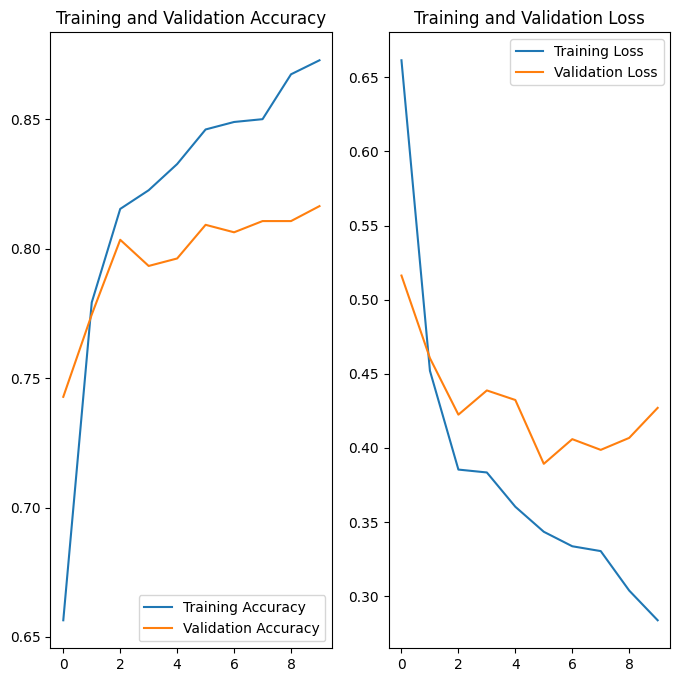

In [19]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs_range = range(epochs)

plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()


In [26]:
images = glob.glob(data_dir + '/TEST/*')

'./data/QualityControlCropped/TEST\\ACCEPT-1704752034771.jpg'